<a href="https://colab.research.google.com/github/adithya72/Deep-Learning/blob/Develop/SingalQualityPredictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural Networks - Predict equipment signal quality

A communications equipment manufacturing company has a product which is responsible for emitting informative signals. Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various parameters.

 **Objective** : Build a classifier neural network model that can take various singal parameters as inputs and determine/predict the signal strength or quality.

**Dataset** : The data set contains information on various signal tests performed:
1. Parameters: Various measurable signal parameters.
2. Signal_Quality: Final signal strength or quality

**ML libraries** : Keras, tensorflow

This notebook covers,

1. Data importing and understanding
2. Data preprocessing
3. Model Training & Evaluation using Neural Network


# 1. Data importing and understanding

In [1]:
#import required libraries
import os
import pandas as pd
import numpy as np
import tensorflow
#ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Mount google drive where thed dataset file resides
from google.colab import drive
drive.mount("/content/Drive")
os.getcwd() #check the current working directory

Mounted at /content/Drive


'/content'

In [3]:
#import the dataset - signal.csv from google drive
dataset_file = '/content/Drive/MyDrive/NN Dataset/Signal.csv'
signaldata = pd.read_csv(dataset_file)
print("Total numbers of rows and columns in dataset : ", signaldata.shape)
print("Glance of first few rows")
signaldata.head()


Total numbers of rows and columns in dataset :  (1599, 12)
Glance of first few rows


,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#dataset info
signaldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Observation - dataset contains 10 input variables of float64 and 1 tagert variable of int64. No missing values are observed.

In [5]:
#Check for missing values and print percentage for each attribute.
# The percentage of missing values in a dataset is an informative measure of how much data is missing or unavailable.
# It can help assess the quality and reliability of the data, and to decide how to handle the missing values.

# Calculate the number of missing values in each column and print
missing_values = signaldata.isnull().sum()
print("1. Missing values in each column")
print(missing_values)

# Calculate the total number of values in each column
total_values = signaldata.count() + missing_values
print("2. Total number of values in each column")
print(total_values)

# Calculate the percentage of missing values in each column
percentage_missing = (missing_values / total_values) * 100

# Print the results
print("3. percentage of missing value")
print(percentage_missing)


1. Missing values in each column
Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64
2. Total number of values in each column
Parameter 1        1599
Parameter 2        1599
Parameter 3        1599
Parameter 4        1599
Parameter 5        1599
Parameter 6        1599
Parameter 7        1599
Parameter 8        1599
Parameter 9        1599
Parameter 10       1599
Parameter 11       1599
Signal_Strength    1599
dtype: int64
3. percentage of missing value
Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64


Conclusion - Zero missing values

In [6]:
# Check for presence of duplicate records in the dataset and impute with appropriate method.
# duplicate records can be problematic because they can skew the results

#Check for duplicate records
signaldata.duplicated().sum()


240

Conclusion - There are 240 duplicate records, hence we should be dropping them

In [7]:
signaldata_withoutDup = signaldata.drop_duplicates()
print("Total number of rows and columns with out duplicate data",signaldata_withoutDup.shape)

Total number of rows and columns with out duplicate data (1359, 12)


In [8]:
#Visualise distribution of the target variable - Signal_Strength
print(signaldata_withoutDup["Signal_Strength"].value_counts(1))

5    0.424577
6    0.393672
7    0.122884
4    0.038999
8    0.012509
3    0.007358
Name: Signal_Strength, dtype: float64


The target varible is numerical and the values in the dataset are concentrated around 5 & 6 accounting to about 81% followed by 7 with 12%. With total classes count of 6.

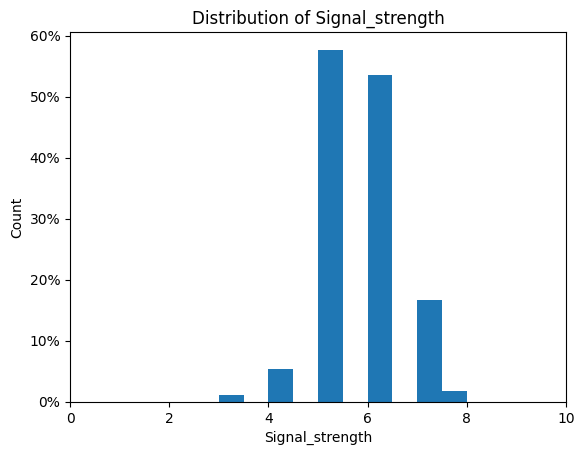

In [9]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
signaldata_withoutDup["Signal_Strength"].hist(grid=False)
# add labels and title
plt.xlabel('Signal_strength')
plt.ylabel('Count')
plt.title('Distribution of Signal_strength')
plt.xlim(0, 10)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1000))

In [10]:
# Statisical summary of other columns
signaldata_withoutDup.describe().T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
Parameter 2,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
Parameter 3,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
Parameter 4,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
Parameter 5,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
Parameter 6,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
Parameter 7,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
Parameter 8,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
Parameter 9,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
Parameter 10,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


From statistical summary, we can infer the below findings :

*  Parameter 7 has the higest std followed by parameter 6, Where in parameter 8 has the lowest.
*   Target variable Signal_Strength got 6 classes.
*   Skewness & outlier concenrtaion need to be checked.


## Perform Univariate Analysis

Parameter 1
Skew : 0.94


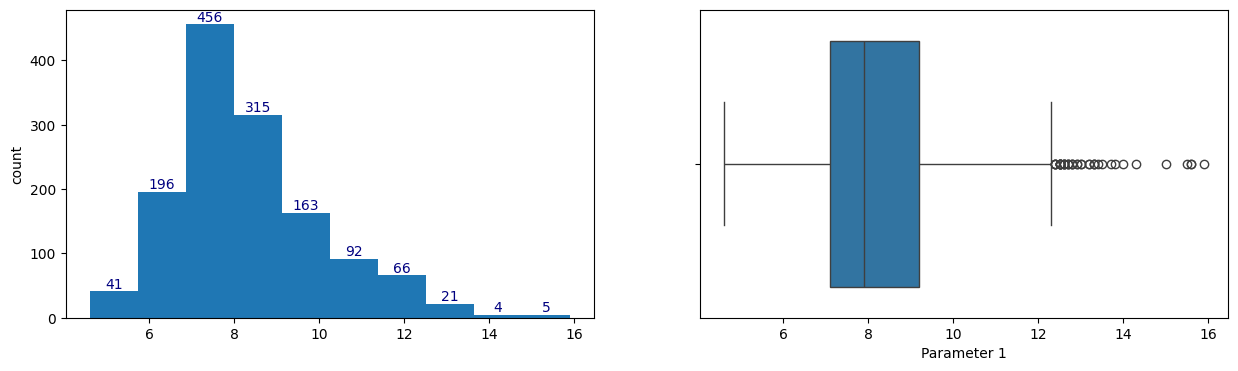

Q1 is :  7.1
Q2 is :  7.9
Q3 is :  9.2
IQR is: 2.0999999999999996
Lower Whisker, Upper Whisker :  3.95 , 12.349999999999998
Number of outliers are: 41
Parameter 2
Skew : 0.73


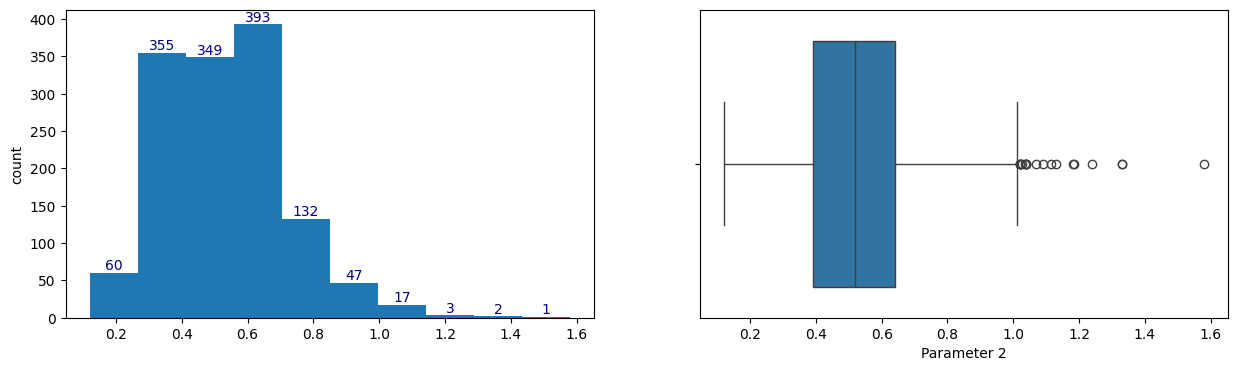

Q1 is :  0.39
Q2 is :  0.52
Q3 is :  0.64
IQR is: 0.25
Lower Whisker, Upper Whisker :  0.015000000000000013 , 1.0150000000000001
Number of outliers are: 19
Parameter 3
Skew : 0.31


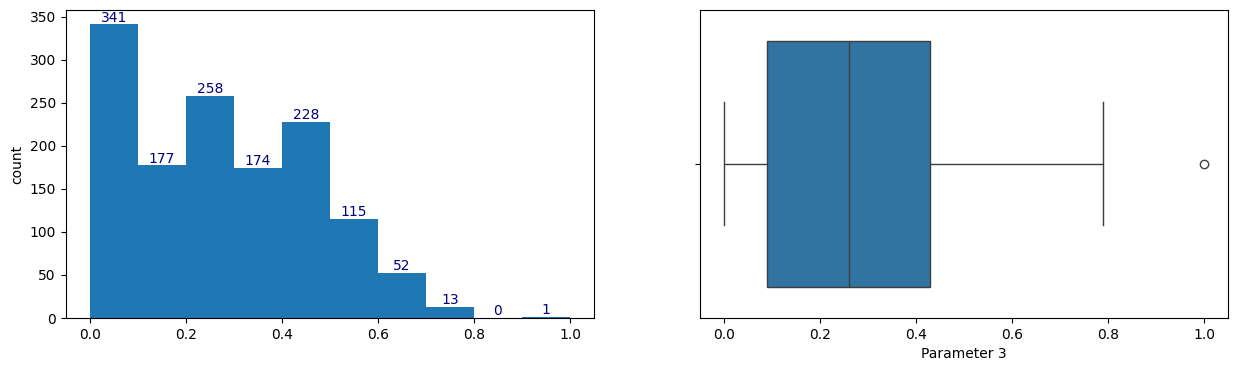

Q1 is :  0.09
Q2 is :  0.26
Q3 is :  0.43
IQR is: 0.33999999999999997
Lower Whisker, Upper Whisker :  -0.42000000000000004 , 0.94
Number of outliers are: 1
Parameter 4
Skew : 4.55


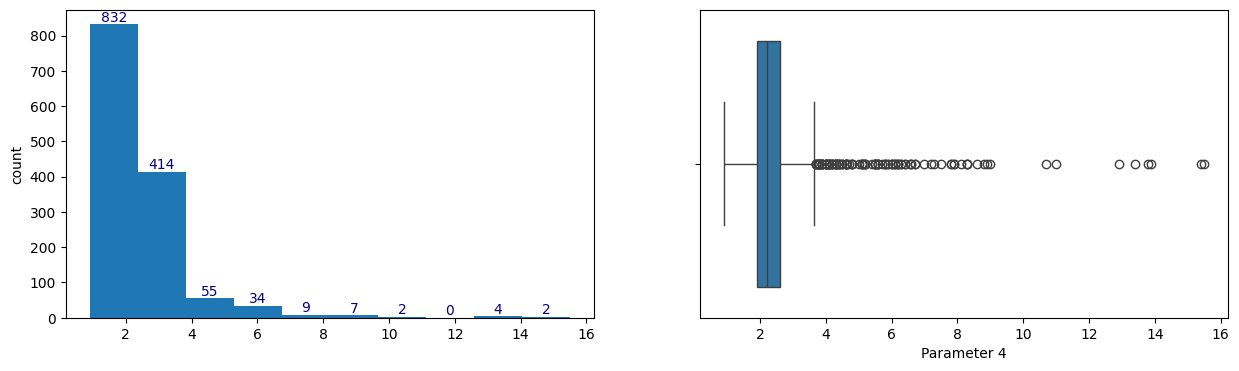

Q1 is :  1.9
Q2 is :  2.2
Q3 is :  2.6
IQR is: 0.7000000000000002
Lower Whisker, Upper Whisker :  0.8499999999999996 , 3.6500000000000004
Number of outliers are: 126
Parameter 5
Skew : 5.5


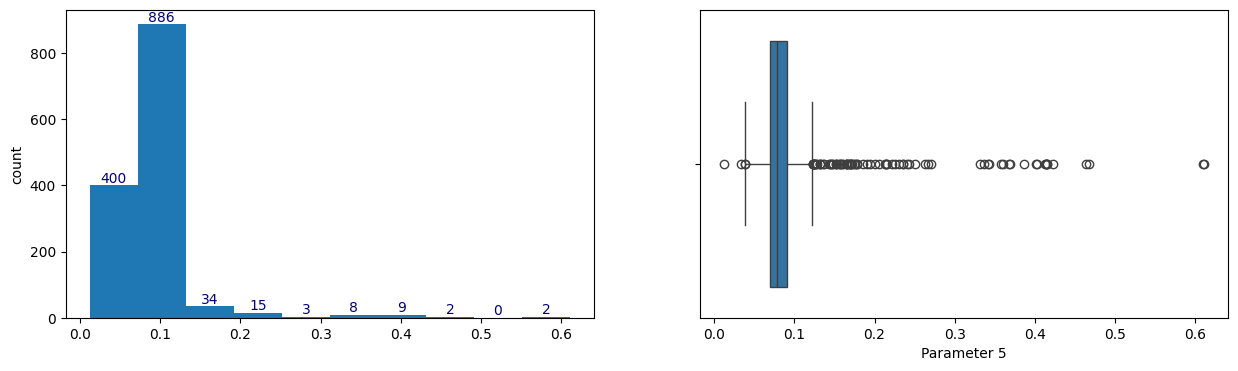

Q1 is :  0.07
Q2 is :  0.079
Q3 is :  0.091
IQR is: 0.02099999999999999
Lower Whisker, Upper Whisker :  0.03850000000000002 , 0.12249999999999998
Number of outliers are: 87
Parameter 6
Skew : 1.23


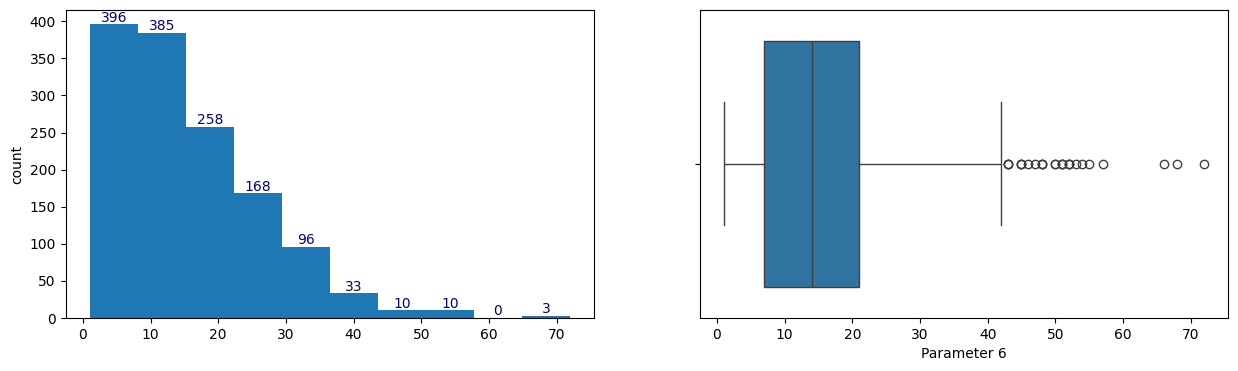

Q1 is :  7.0
Q2 is :  14.0
Q3 is :  21.0
IQR is: 14.0
Lower Whisker, Upper Whisker :  -14.0 , 42.0
Number of outliers are: 26
Parameter 7
Skew : 1.54


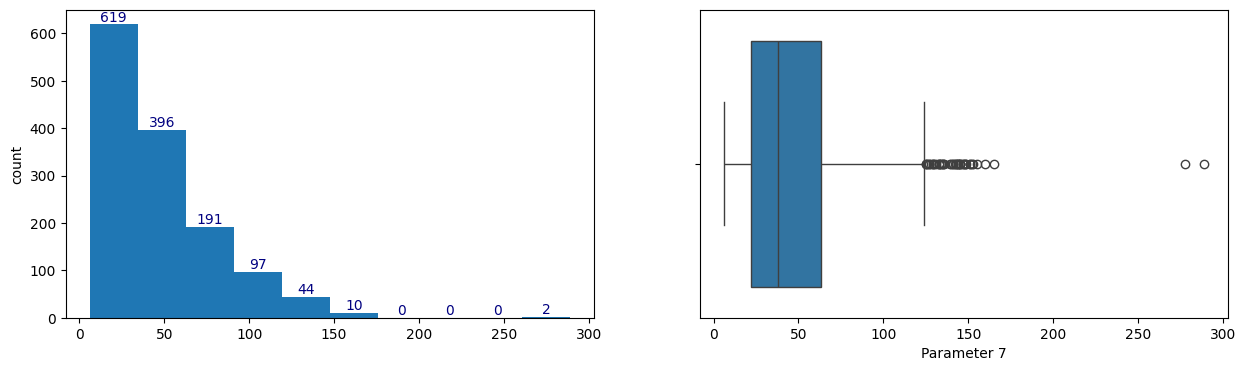

Q1 is :  22.0
Q2 is :  38.0
Q3 is :  63.0
IQR is: 41.0
Lower Whisker, Upper Whisker :  -39.5 , 124.5
Number of outliers are: 45
Parameter 8
Skew : 0.04


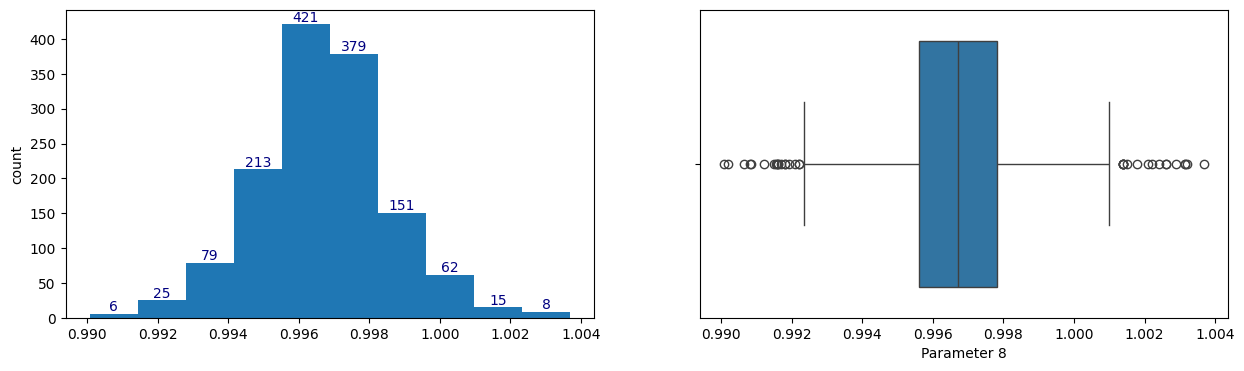

Q1 is :  0.9956
Q2 is :  0.9967
Q3 is :  0.99782
IQR is: 0.0022199999999999998
Lower Whisker, Upper Whisker :  0.99227 , 1.00115
Number of outliers are: 35
Parameter 9
Skew : 0.23


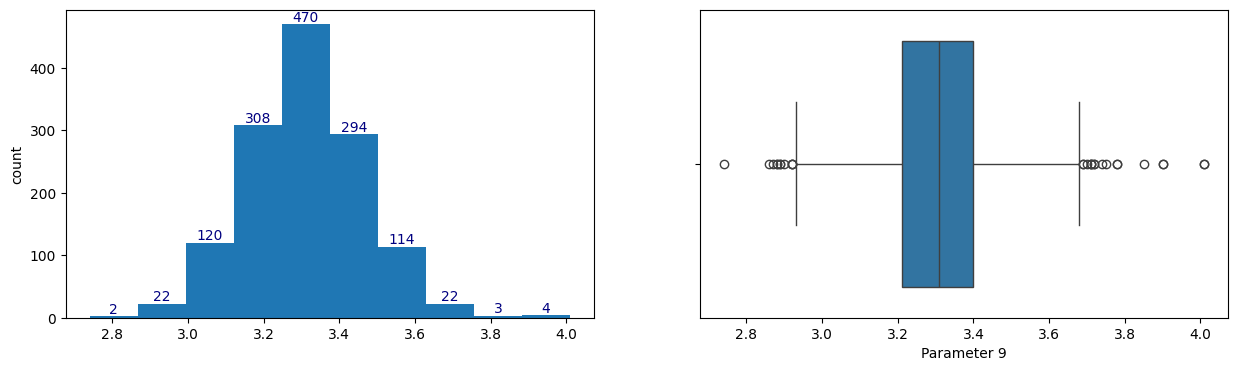

Q1 is :  3.21
Q2 is :  3.31
Q3 is :  3.4
IQR is: 0.18999999999999995
Lower Whisker, Upper Whisker :  2.925 , 3.6849999999999996
Number of outliers are: 28
Parameter 10
Skew : 2.41


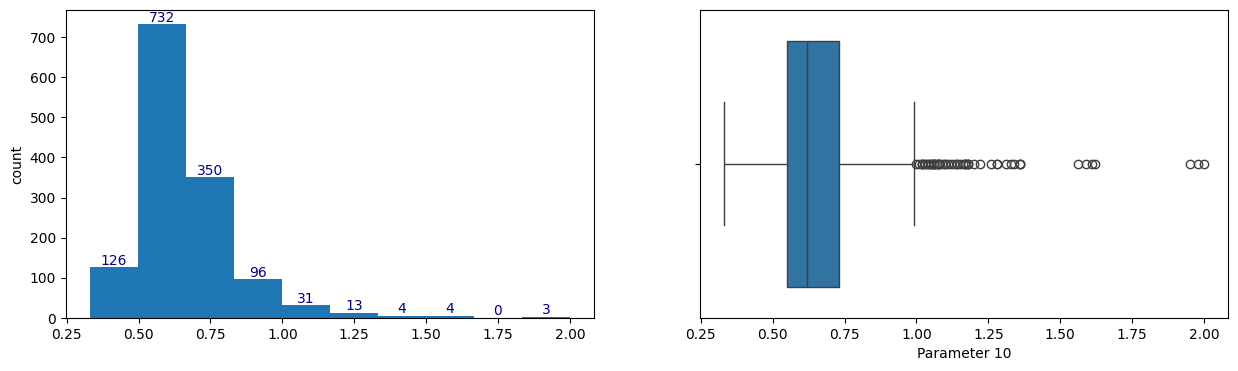

Q1 is :  0.55
Q2 is :  0.62
Q3 is :  0.73
IQR is: 0.17999999999999994
Lower Whisker, Upper Whisker :  0.28000000000000014 , 0.9999999999999999
Number of outliers are: 55
Parameter 11
Skew : 0.86


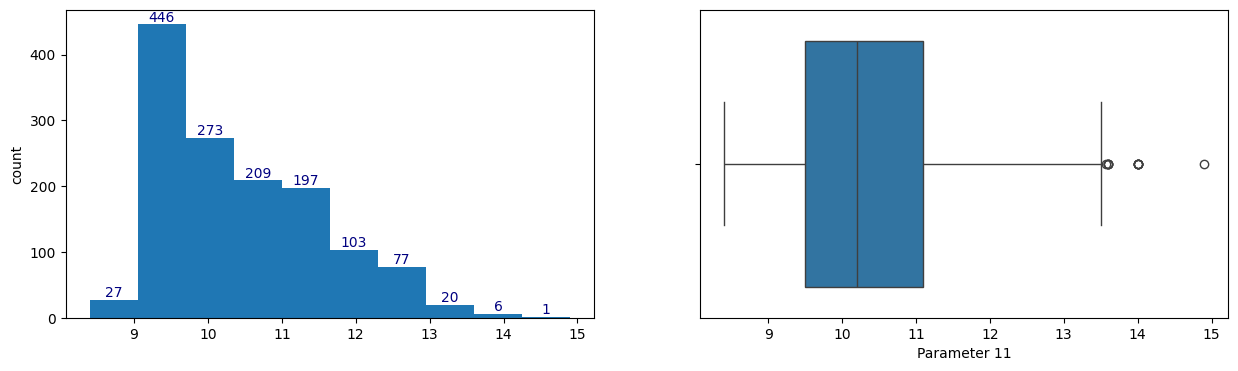

Q1 is :  9.5
Q2 is :  10.2
Q3 is :  11.1
IQR is: 1.5999999999999996
Lower Whisker, Upper Whisker :  7.1000000000000005 , 13.5
Number of outliers are: 12


In [11]:
import seaborn as sns
for col in signaldata_withoutDup.select_dtypes(include=np.float64).columns.tolist():
    print(col)
    print('Skew :', round(signaldata_withoutDup[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    values, bins, bars = plt.hist(signaldata_withoutDup[col])
    plt.ylabel('count')
    plt.bar_label(bars, fontsize=10, color='navy')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=signaldata_withoutDup[col])
    plt.show()
    #Quartiles segment distribution
    Q1 = signaldata_withoutDup[col].quantile(0.25)
    Q2 = signaldata_withoutDup[col].quantile(0.50)
    Q3 = signaldata_withoutDup[col].quantile(0.75)
    IQR = Q3 - Q1
    L_W = (Q1 - 1.5 *IQR)
    U_W = (Q3 + 1.5 *IQR)
    print('Q1 is : ',Q1)
    print('Q2 is : ',Q2)
    print('Q3 is : ',Q3)
    print('IQR is:',IQR)
    print('Lower Whisker, Upper Whisker : ',L_W,',',U_W)
    bools = (signaldata_withoutDup[col] < (Q1 - 1.5 *IQR)) |(signaldata_withoutDup[col] > (Q3 + 1.5 * IQR))
    print('Number of outliers are:',bools.sum())

## Insights from the initial data analysis

In summary,

*  The dataset consists of 1599 rows and 12 columns. 11 are input parameters and 1 - signal_strength is target variable.
*  No null values are present but there are about 240 duplicate values, and need to removed.
*  The distribution of target values ar concentrated around  5 & 6 accounting to about 81% followed by 7 with 12%. And number of classes are 6.
*  Parameters 10, 7, 5, 4, 1 are heavily right skewed
*  Parameters require outlier treatment











# 2. Data preprocessing

In [12]:
# Treat outliers
cols=[]
for col in signaldata_withoutDup.select_dtypes(include=np.float64).columns.tolist():
    #calculating the outiers in attribute
    Q1 = signaldata_withoutDup[col].quantile(0.25)
    Q2 = signaldata_withoutDup[col].quantile(0.50)
    Q3 = signaldata_withoutDup[col].quantile(0.75)
    IQR = Q3 - Q1
    L_W = (Q1 - 1.5 *IQR)
    U_W = (Q3 + 1.5 *IQR)
    up_cnt = signaldata_withoutDup[signaldata_withoutDup[col]>U_W][col].shape[0]
    #print('Upper count=',up_cnt)
    lw_cnt = signaldata_withoutDup[signaldata_withoutDup[col]<L_W][col].shape[0]
    #print('lower count=',lw_cnt)
    if(up_cnt+lw_cnt) > 0:
      signaldata_withoutDup.loc[signaldata_withoutDup[col] > U_W,col] = U_W
      signaldata_withoutDup.loc[signaldata_withoutDup[col] < L_W,col] = L_W


Parameter 1
Skew : 0.68


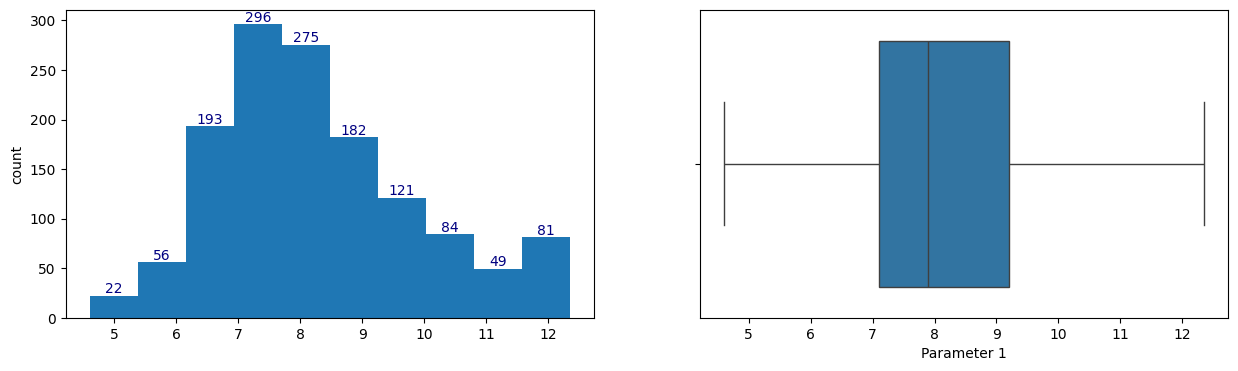

Q1 is :  7.1
Q2 is :  7.9
Q3 is :  9.2
IQR is: 2.0999999999999996
Lower Whisker, Upper Whisker :  3.95 , 12.349999999999998
Number of outliers are: 0
Parameter 2
Skew : 0.46


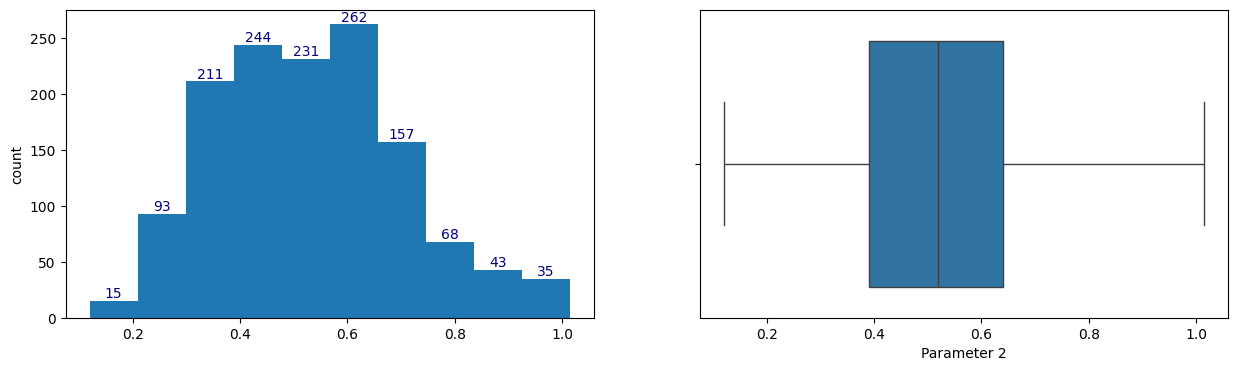

Q1 is :  0.39
Q2 is :  0.52
Q3 is :  0.64
IQR is: 0.25
Lower Whisker, Upper Whisker :  0.015000000000000013 , 1.0150000000000001
Number of outliers are: 0
Parameter 3
Skew : 0.31


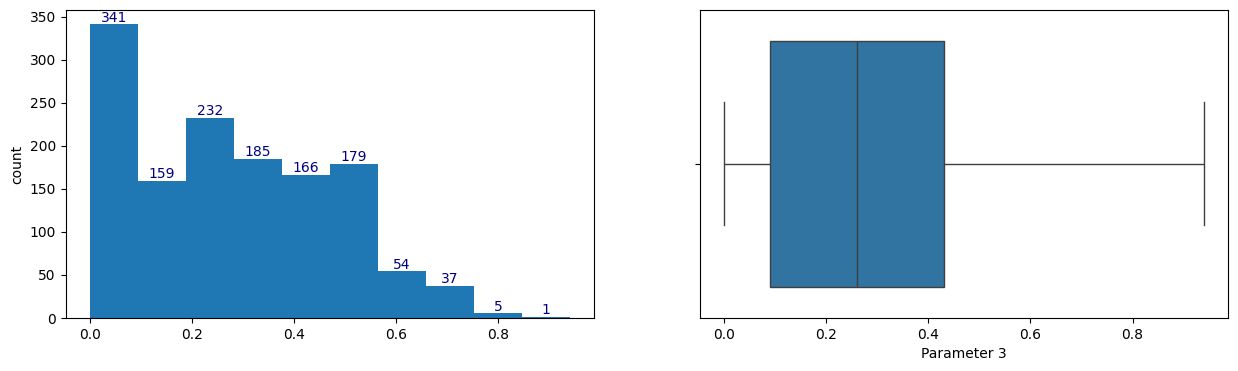

Q1 is :  0.09
Q2 is :  0.26
Q3 is :  0.43
IQR is: 0.33999999999999997
Lower Whisker, Upper Whisker :  -0.42000000000000004 , 0.94
Number of outliers are: 0
Parameter 4
Skew : 0.83


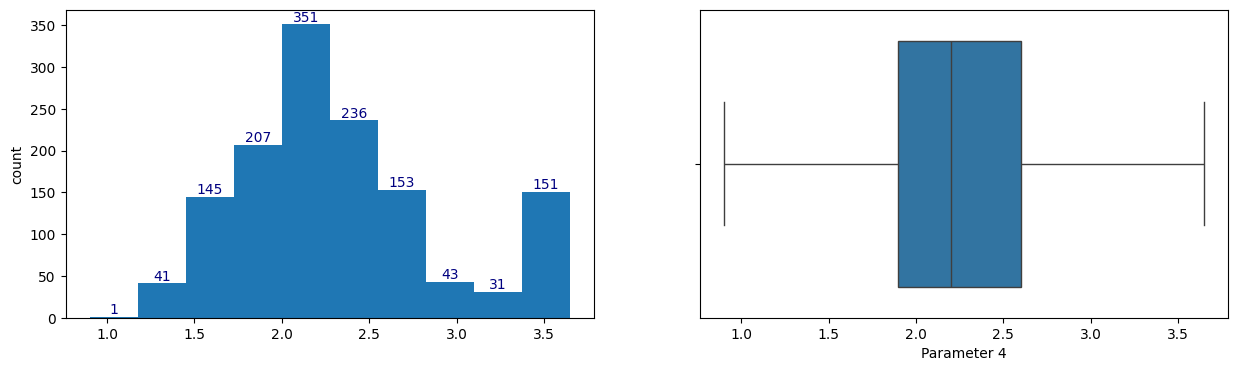

Q1 is :  1.9
Q2 is :  2.2
Q3 is :  2.6
IQR is: 0.7000000000000002
Lower Whisker, Upper Whisker :  0.8499999999999996 , 3.6500000000000004
Number of outliers are: 0
Parameter 5
Skew : 0.49


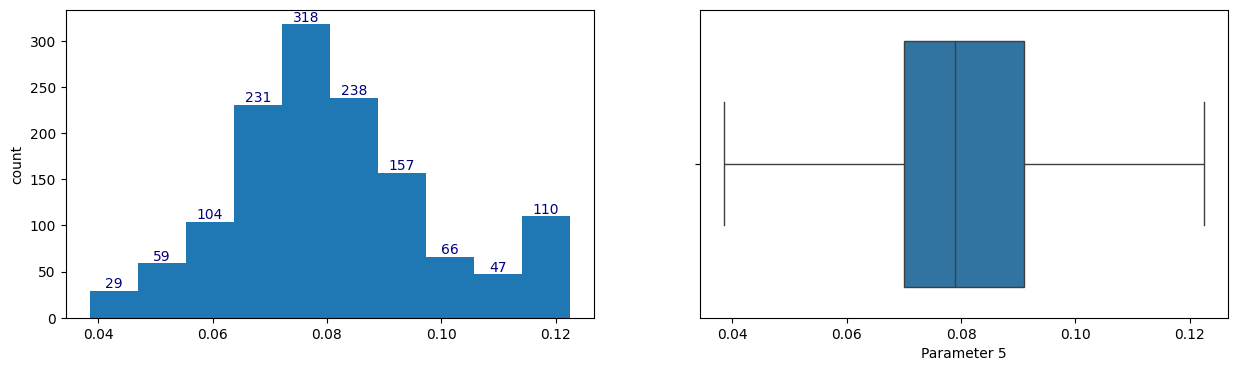

Q1 is :  0.07
Q2 is :  0.079
Q3 is :  0.091
IQR is: 0.02099999999999999
Lower Whisker, Upper Whisker :  0.03850000000000002 , 0.12249999999999998
Number of outliers are: 0
Parameter 6
Skew : 0.86


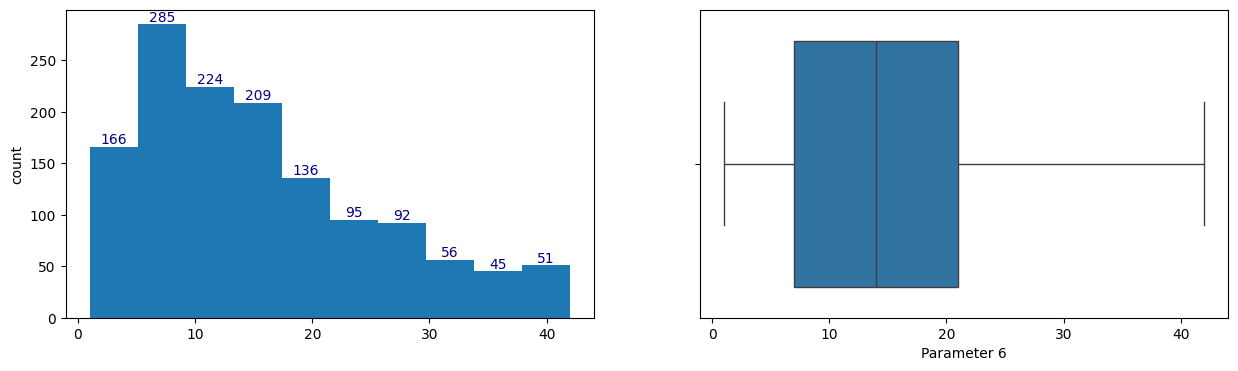

Q1 is :  7.0
Q2 is :  14.0
Q3 is :  21.0
IQR is: 14.0
Lower Whisker, Upper Whisker :  -14.0 , 42.0
Number of outliers are: 0
Parameter 7
Skew : 0.98


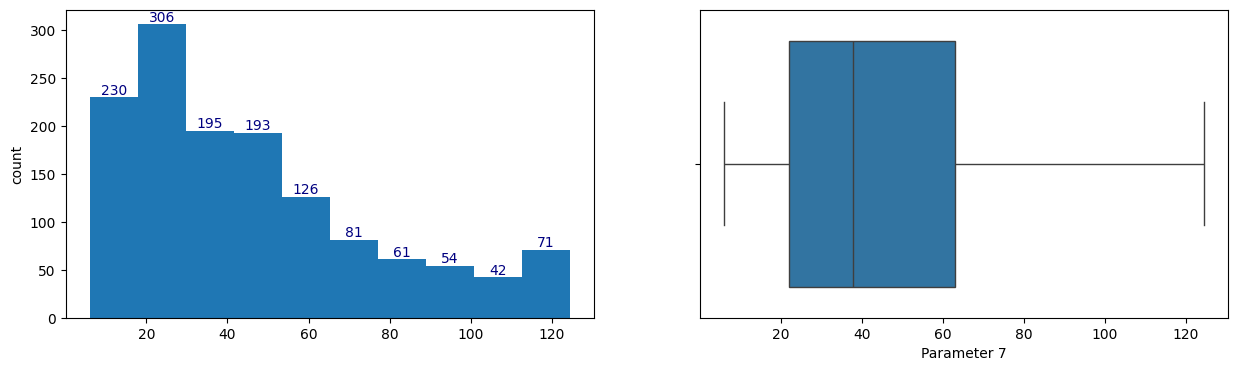

Q1 is :  22.0
Q2 is :  38.0
Q3 is :  63.0
IQR is: 41.0
Lower Whisker, Upper Whisker :  -39.5 , 124.5
Number of outliers are: 0
Parameter 8
Skew : 0.01


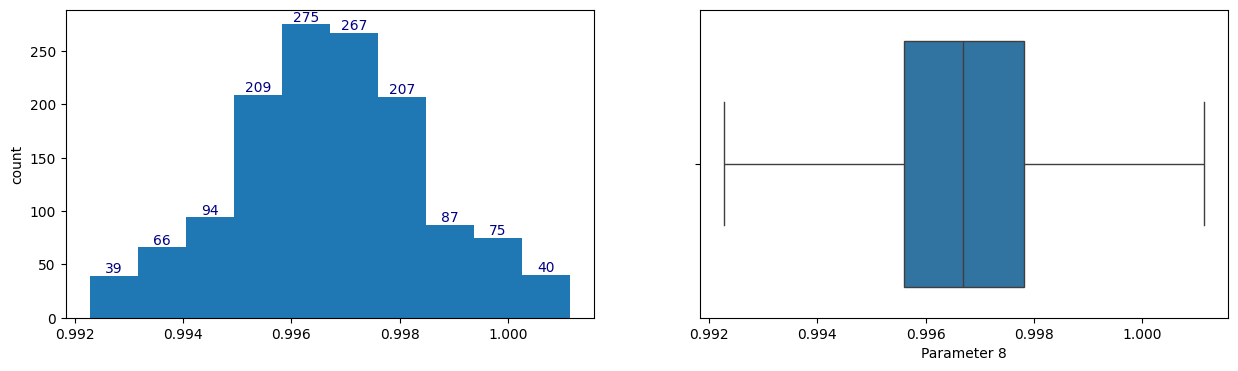

Q1 is :  0.9956
Q2 is :  0.9967
Q3 is :  0.99782
IQR is: 0.0022199999999999998
Lower Whisker, Upper Whisker :  0.99227 , 1.00115
Number of outliers are: 0
Parameter 9
Skew : 0.07


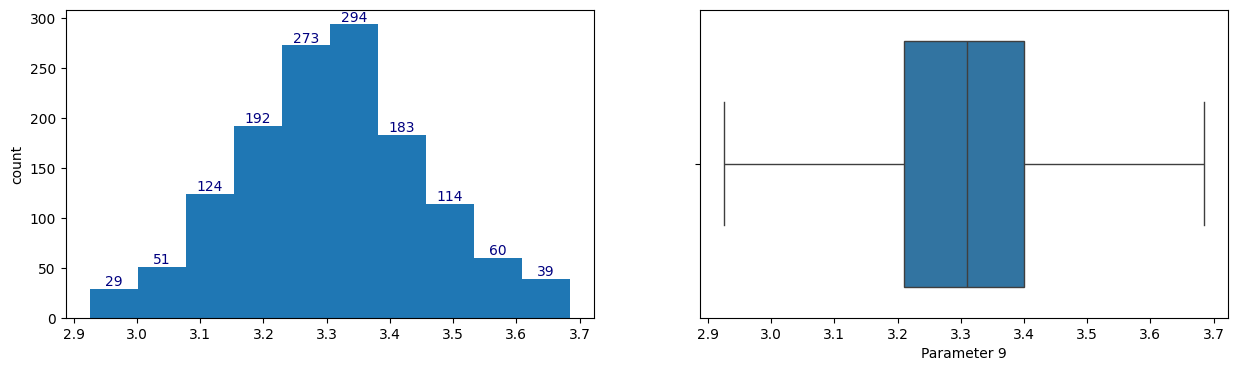

Q1 is :  3.21
Q2 is :  3.31
Q3 is :  3.4
IQR is: 0.18999999999999995
Lower Whisker, Upper Whisker :  2.925 , 3.6849999999999996
Number of outliers are: 0
Parameter 10
Skew : 0.82


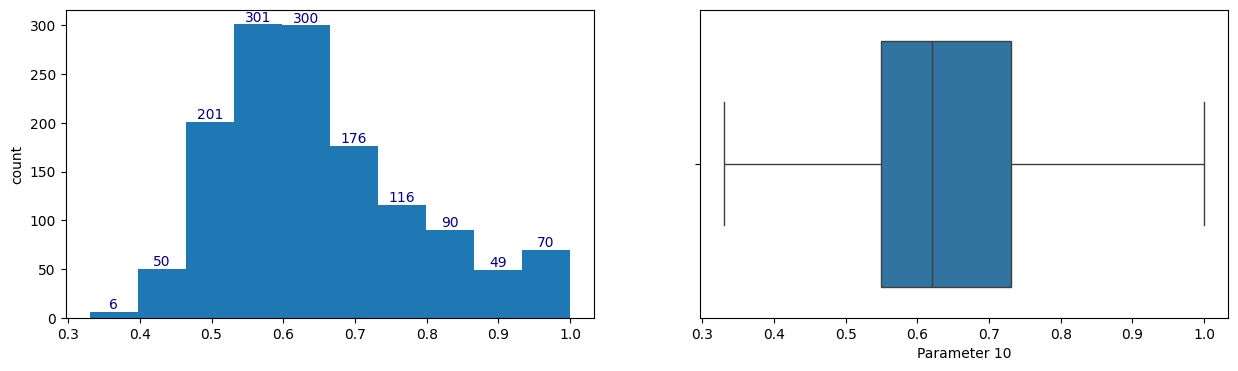

Q1 is :  0.55
Q2 is :  0.62
Q3 is :  0.73
IQR is: 0.17999999999999994
Lower Whisker, Upper Whisker :  0.28000000000000014 , 0.9999999999999999
Number of outliers are: 0
Parameter 11
Skew : 0.79


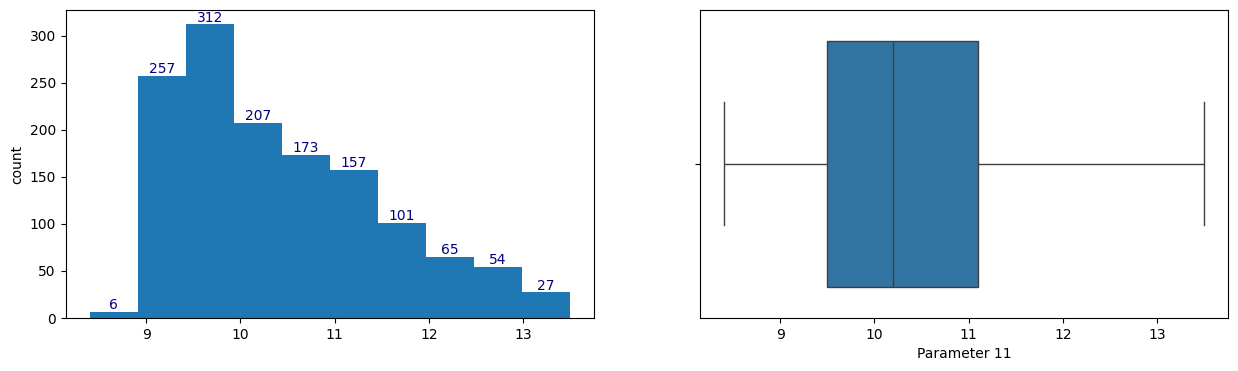

Q1 is :  9.5
Q2 is :  10.2
Q3 is :  11.1
IQR is: 1.5999999999999996
Lower Whisker, Upper Whisker :  7.1000000000000005 , 13.5
Number of outliers are: 0


In [13]:
#Perform Univariate Analaysis again to ensure no outliers
import seaborn as sns
for col in signaldata_withoutDup.select_dtypes(include=np.float64).columns.tolist():
    print(col)
    print('Skew :', round(signaldata_withoutDup[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    values, bins, bars = plt.hist(signaldata_withoutDup[col])
    plt.ylabel('count')
    plt.bar_label(bars, fontsize=10, color='navy')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=signaldata_withoutDup[col])
    plt.show()
    #Quartiles segment distribution
    Q1 = signaldata_withoutDup[col].quantile(0.25)
    Q2 = signaldata_withoutDup[col].quantile(0.50)
    Q3 = signaldata_withoutDup[col].quantile(0.75)
    IQR = Q3 - Q1
    L_W = (Q1 - 1.5 *IQR)
    U_W = (Q3 + 1.5 *IQR)
    print('Q1 is : ',Q1)
    print('Q2 is : ',Q2)
    print('Q3 is : ',Q3)
    print('IQR is:',IQR)
    print('Lower Whisker, Upper Whisker : ',L_W,',',U_W)
    bools = (signaldata_withoutDup[col] < (Q1 - 1.5 *IQR)) |(signaldata_withoutDup[col] > (Q3 + 1.5 * IQR))
    print('Number of outliers are:',bools.sum())

In [14]:
# Split the data into X & Y
# Start with seperating feature and target variables

X_data = signaldata_withoutDup.iloc[:, :-1] # except Target column
X_data.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [15]:
y_data = signaldata_withoutDup.iloc[:, -1] # select Target column
y_data.head()

0    5
1    5
2    5
3    6
5    5
Name: Signal_Strength, dtype: int64

In [16]:
# Spit the dataset in to training and testing set in 70:30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3,stratify=y_data, random_state = 7)

In [33]:
# Check if train and test data is in sync
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(951, 11)
(408, 11)
(951,)
(408,)


In [37]:
#Normalize the train and test data,
#In Neural network -> activation functions: They perform well when the numbers are close to zero hence we are going to normalize them
#in to vectors

from sklearn import preprocessing
X_train_Norm = preprocessing.normalize(X_train)
X_test_Norm = preprocessing.normalize(X_test)

In [39]:
X_train_Norm[0]

array([0.36424467, 0.01529828, 0.01821223, 0.12384319, 0.00389742,
       0.25497127, 0.76491381, 0.03634798, 0.11874376, 0.03387475,
       0.42980871])

In [40]:
X_test_Norm[0]

array([0.32494532, 0.0270025 , 0.        , 0.09611059, 0.00416479,
       0.41190252, 0.64073725, 0.04553262, 0.15652296, 0.02517182,
       0.52631989])

Target variables contains numbers from 0-9, but neural network is not going to output the categorial variables like 0,1,2,3,4,5,6,7,8,9 instead it returns a output in the form of vector with a probability. So first all the target label's should be converted in to vectors and model will return either zero's or ones, so for example if it returns 4 zeros then it is 4, if returns 5 zero it would be 5. we use technique called one hot encoding OHT to convert test labels in to vectors.

In [41]:
#Conver in to array
y_train_label = np.array(y_train)
y_test_label = np.array(y_test)

In [42]:
print('Training Set Shape', X_train_Norm.shape, y_train.shape)
print('Test Set Shape', X_test_Norm.shape, y_test.shape)

Training Set Shape (951, 11) (951,)
Test Set Shape (408, 11) (408,)


In [51]:
num_classes = 10 #although target variable is concentrated around 3 - 9, let's label output from 0-9
from keras.utils import to_categorical
y_train_cat = to_categorical(y_train_label,num_classes)
y_test_cat = to_categorical(y_test_label,num_classes)



In [52]:
print(y_train_label[:5])
print("first 15 training labels as one-hot encoded vectors:\n", y_train_cat[:5])

[6 5 5 5 6]
first 15 training labels as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In summary,

*   Outliers are treated
*   Data is split in to train and test
*   Data pre-processing and transformation is complete
*   And, finally data is ready to be feed to model





# 3. Model Building Training and Evalution

In [53]:
# define model
inputs = 11 #no of inputs
from keras import optimizers
from keras import Sequential
from keras.layers import Dense

#model is sequential
model = Sequential()

#add one layer -
#Dense = every node connected to every node,
#no of nodes = 10,
#activation is softmax function which returns probability, given it's classification problem
#input shape = no of inputs
#softmax takes all output and divides by sum of outputs to check the probability of y^ to y.
model.add(Dense(10, activation="softmax", kernel_initializer="he_uniform",input_shape=(inputs,)))


#Model optimizer functions - RMSprop, Adagrad - adam and SGD - Stochastic Gradient Descent - we will choose Adam to start with
#An optimization algorithm finds the value of the parameters (weights) that minimize the error when mapping inputs to outputs.
from keras import losses

adam = optimizers.Adam(learning_rate=1e-3) #lr = learning rate 1e-3 = 10 to the power -3 = 1/10 ^ 3 = 0.001
model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])
#loss function used is catogorical cross entropy since it's classification problem
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                120       
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:

#add callbacks - these are functions called bny optimizers to check the status of the model. Read more ...
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', save_weights_only=True, mode="max", verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2,min_lr=0.00001, model='auto')
callbacks = [checkpoint, reduce_lr]

In [55]:
# ready to train the model
history = model.fit(X_train_Norm, y_train_cat, batch_size=10, epochs=10,verbose=2,callbacks=callbacks,validation_split=0.2)


Epoch 1/10

Epoch 1: saving model to model_weights.h5
76/76 - 1s - loss: 2.3857 - accuracy: 0.1197 - val_loss: 2.2507 - val_accuracy: 0.3089 - lr: 0.0010 - 621ms/epoch - 8ms/step
Epoch 2/10

Epoch 2: saving model to model_weights.h5
76/76 - 0s - loss: 2.1511 - accuracy: 0.3618 - val_loss: 2.0349 - val_accuracy: 0.3770 - lr: 0.0010 - 105ms/epoch - 1ms/step
Epoch 3/10

Epoch 3: saving model to model_weights.h5
76/76 - 0s - loss: 1.9613 - accuracy: 0.3934 - val_loss: 1.8623 - val_accuracy: 0.3770 - lr: 0.0010 - 104ms/epoch - 1ms/step
Epoch 4/10

Epoch 4: saving model to model_weights.h5
76/76 - 0s - loss: 1.8107 - accuracy: 0.3934 - val_loss: 1.7256 - val_accuracy: 0.3822 - lr: 0.0010 - 109ms/epoch - 1ms/step
Epoch 5/10

Epoch 5: saving model to model_weights.h5
76/76 - 0s - loss: 1.6935 - accuracy: 0.3908 - val_loss: 1.6174 - val_accuracy: 0.3874 - lr: 0.0010 - 112ms/epoch - 1ms/step
Epoch 6/10

Epoch 6: saving model to model_weights.h5
76/76 - 0s - loss: 1.6023 - accuracy: 0.3868 - val_

Model accuracy is 37%. And it should be improved.

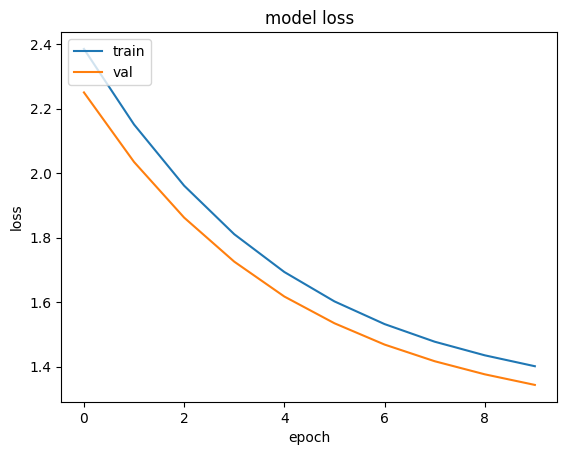

In [56]:
# Plot Training Loss and Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

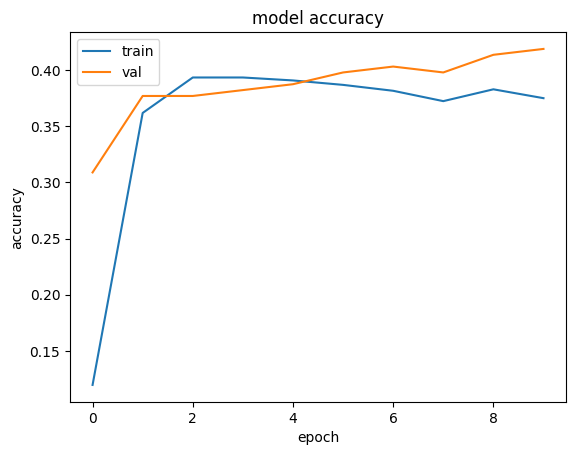

In [57]:
# Plot Training Accuracy and Validation Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [58]:
#evaluate the model
results = model.evaluate(X_test_Norm, y_test_cat)

13/13 [==============================] - 0s 2ms/step - loss: 1.3922 - accuracy: 0.3824


In [59]:
# use test dataset to predict
y_pred = model.predict(X_test_Norm, batch_size=20, verbose=0)

Model on the test data. And the out of y_pred would be probabilities of each output class.

In [60]:
print(y_pred[0:5])

[[0.02204759 0.01321518 0.01705935 0.02016206 0.04705869 0.34397164
  0.32941833 0.1356228  0.03895283 0.03249161]
 [0.027398   0.02210899 0.01876746 0.02155599 0.05617505 0.2989414
  0.35242838 0.12007581 0.0436089  0.03893996]
 [0.02298399 0.0168892  0.01446002 0.018702   0.05449263 0.32887405
  0.3381997  0.13238172 0.03824139 0.03477522]
 [0.03301167 0.02405019 0.0261643  0.02299623 0.04882089 0.274589
  0.37423524 0.10959631 0.04447314 0.04206308]
 [0.03676645 0.02866891 0.02798362 0.02270345 0.04917717 0.25536236
  0.38359654 0.10726953 0.04371864 0.04475339]]


In [61]:
# Compute the max value of these outputs
y_pred_final = []
import numpy as np
for i in y_pred:
  y_pred_final.append(np.argmax(i)) #argmax returns max value of the probability value

In [63]:
#Generating classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_label, y_pred_final))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.29      0.10      0.15       173
           6       0.40      0.86      0.55       161
           7       0.00      0.00      0.00        50
           8       0.00      0.00      0.00         5

    accuracy                           0.38       408
   macro avg       0.11      0.16      0.12       408
weighted avg       0.28      0.38      0.28       408



[[  0   0   1   2   0   0]
 [  0   0   3  13   0   0]
 [  0   0  17 156   0   0]
 [  0   0  22 139   0   0]
 [  0   0  14  36   0   0]
 [  0   0   2   3   0   0]]


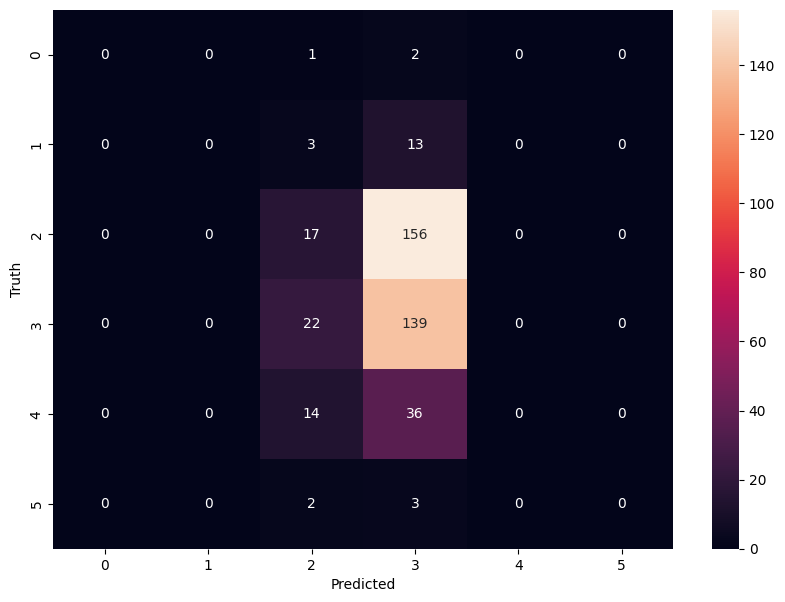

In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test_label, y_pred_final)
print(cm)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [71]:
#Misclassified numbers
index=0
misclassified_inputs=[]
for label, predict in zip(y_test_label,y_pred_final):
  if label != predict:
    misclassified_inputs.append(index)
  index += 1
print("Total items wrongly predicted  : ", len(misclassified_inputs), "out of", len(y_test))

Total items wrongly predicted  :  252 out of 408


Let's try fine tunning the model to increase the accuracy

In [72]:
# Use more epochs and small batch size
history = model.fit(X_train_Norm, y_train_cat, batch_size=5, epochs=20,verbose=2,callbacks=callbacks,validation_split=0.2)

Epoch 1/20

Epoch 1: saving model to model_weights.h5
152/152 - 0s - loss: 1.3650 - accuracy: 0.3592 - val_loss: 1.2974 - val_accuracy: 0.4136 - lr: 0.0010 - 406ms/epoch - 3ms/step
Epoch 2/20

Epoch 2: saving model to model_weights.h5
152/152 - 0s - loss: 1.3299 - accuracy: 0.3553 - val_loss: 1.2656 - val_accuracy: 0.4084 - lr: 0.0010 - 182ms/epoch - 1ms/step
Epoch 3/20

Epoch 3: saving model to model_weights.h5
152/152 - 0s - loss: 1.3059 - accuracy: 0.3632 - val_loss: 1.2424 - val_accuracy: 0.4136 - lr: 0.0010 - 208ms/epoch - 1ms/step
Epoch 4/20

Epoch 4: saving model to model_weights.h5
152/152 - 0s - loss: 1.2888 - accuracy: 0.3658 - val_loss: 1.2269 - val_accuracy: 0.4084 - lr: 0.0010 - 170ms/epoch - 1ms/step
Epoch 5/20

Epoch 5: saving model to model_weights.h5
152/152 - 0s - loss: 1.2747 - accuracy: 0.3592 - val_loss: 1.2143 - val_accuracy: 0.4084 - lr: 0.0010 - 213ms/epoch - 1ms/step
Epoch 6/20

Epoch 6: saving model to model_weights.h5
152/152 - 0s - loss: 1.2640 - accuracy: 0

Model accuracy is now increased to 49%.

In [73]:
# use test dataset to predict
y_pred = model.predict(X_test_Norm, batch_size=20, verbose=0)

In [74]:
# Compute the max value of these outputs
y_pred_final = []
import numpy as np
for i in y_pred:
  y_pred_final.append(np.argmax(i)) #argmax returns max value of the probability value

In [75]:
#Generating classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_label, y_pred_final))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.53      0.72      0.61       173
           6       0.47      0.51      0.49       161
           7       0.00      0.00      0.00        50
           8       0.00      0.00      0.00         5

    accuracy                           0.51       408
   macro avg       0.17      0.21      0.18       408
weighted avg       0.41      0.51      0.45       408



Model was able to predict 51% accurate on test dataset

In [80]:
#let's do one more iteration and see if it further improves accuracy
history = model.fit(X_train_Norm, y_train_cat, batch_size=5, epochs=30,verbose=2,callbacks=callbacks,validation_split=0.2)

Epoch 1/30

Epoch 1: saving model to model_weights.h5
152/152 - 0s - loss: 1.1673 - accuracy: 0.4895 - val_loss: 1.1137 - val_accuracy: 0.4712 - lr: 1.0000e-05 - 314ms/epoch - 2ms/step
Epoch 2/30

Epoch 2: saving model to model_weights.h5
152/152 - 0s - loss: 1.1673 - accuracy: 0.4895 - val_loss: 1.1137 - val_accuracy: 0.4712 - lr: 1.0000e-05 - 273ms/epoch - 2ms/step
Epoch 3/30

Epoch 3: saving model to model_weights.h5
152/152 - 0s - loss: 1.1673 - accuracy: 0.4895 - val_loss: 1.1137 - val_accuracy: 0.4712 - lr: 1.0000e-05 - 275ms/epoch - 2ms/step
Epoch 4/30

Epoch 4: saving model to model_weights.h5
152/152 - 0s - loss: 1.1673 - accuracy: 0.4895 - val_loss: 1.1137 - val_accuracy: 0.4712 - lr: 1.0000e-05 - 277ms/epoch - 2ms/step
Epoch 5/30

Epoch 5: saving model to model_weights.h5
152/152 - 0s - loss: 1.1673 - accuracy: 0.4895 - val_loss: 1.1137 - val_accuracy: 0.4712 - lr: 1.0000e-05 - 212ms/epoch - 1ms/step
Epoch 6/30

Epoch 6: saving model to model_weights.h5
152/152 - 0s - loss: 

No further improvement were seen even after adding more iterations - Model accuracy capped at 49%

In [87]:
# define new model
inputs = 11 #no of inputs
from keras import optimizers
from keras import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

#model is sequential
model_1 = Sequential()
model_1.add(Dense(50, activation="relu", kernel_initializer="he_uniform",input_shape=(inputs,)))
model_1.add(Dense(30, activation="relu", kernel_initializer="he_uniform"))
model_1.add(Dense(20, activation="relu", kernel_initializer="he_uniform"))
model_1.add(Dense(10, activation="softmax"))



#Model optimizer functions - RMSprop, Adagrad - adam and SGD - Stochastic Gradient Descent - we will choose Adam to start with
#An optimization algorithm finds the value of the parameters (weights) that minimize the error when mapping inputs to outputs.
from keras import losses

# use adam
adam = optimizers.Adam(learning_rate=1e-3) #lr = learning rate 1e-3 = 10 to the power -3 = 1/10 ^ 3 = 0.001
model_1.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])
#loss function used is catogorical cross entropy since it's classification problem
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 50)                600       
                                                                 
 dense_9 (Dense)             (None, 30)                1530      
                                                                 
 dense_10 (Dense)            (None, 20)                620       
                                                                 
 dense_11 (Dense)            (None, 10)                210       
                                                                 
Total params: 2960 (11.56 KB)
Trainable params: 2960 (11.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [88]:
#add callbacks - these are functions called bny optimizers to check the status of the model. Read more ...
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', save_weights_only=True, mode="max", verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2,min_lr=0.00001, model='auto')
callbacks = [checkpoint, reduce_lr]

In [90]:
history = model_1.fit(X_train_Norm, y_train_cat, batch_size=5, epochs=50,verbose=2,callbacks=callbacks,validation_split=0.2)

Epoch 1/50

Epoch 1: saving model to model_weights.h5
152/152 - 1s - loss: 1.1398 - accuracy: 0.5039 - val_loss: 1.0908 - val_accuracy: 0.4764 - lr: 1.0000e-05 - 540ms/epoch - 4ms/step
Epoch 2/50

Epoch 2: saving model to model_weights.h5
152/152 - 0s - loss: 1.1398 - accuracy: 0.5039 - val_loss: 1.0908 - val_accuracy: 0.4764 - lr: 1.0000e-05 - 491ms/epoch - 3ms/step
Epoch 3/50

Epoch 3: saving model to model_weights.h5
152/152 - 0s - loss: 1.1397 - accuracy: 0.5039 - val_loss: 1.0906 - val_accuracy: 0.4764 - lr: 1.0000e-05 - 331ms/epoch - 2ms/step
Epoch 4/50

Epoch 4: saving model to model_weights.h5
152/152 - 0s - loss: 1.1397 - accuracy: 0.5039 - val_loss: 1.0907 - val_accuracy: 0.4764 - lr: 1.0000e-05 - 227ms/epoch - 1ms/step
Epoch 5/50

Epoch 5: saving model to model_weights.h5
152/152 - 0s - loss: 1.1397 - accuracy: 0.5039 - val_loss: 1.0906 - val_accuracy: 0.4764 - lr: 1.0000e-05 - 234ms/epoch - 2ms/step
Epoch 6/50

Epoch 6: saving model to model_weights.h5
152/152 - 0s - loss: 

In [91]:
# use test dataset to predict
y_pred = model_1.predict(X_test_Norm, batch_size=20, verbose=0)

In [92]:
# Compute the max value of these outputs
y_pred_final = []
import numpy as np
for i in y_pred:
  y_pred_final.append(np.argmax(i)) #argmax returns max value of the probability value

In [93]:
#Generating classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_label, y_pred_final))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.62      0.60      0.61       173
           6       0.49      0.72      0.58       161
           7       0.00      0.00      0.00        50
           8       0.00      0.00      0.00         5

    accuracy                           0.54       408
   macro avg       0.18      0.22      0.20       408
weighted avg       0.45      0.54      0.49       408



We are now able to get accuracy of 54% which is increase from initial 37%.

In summary,

*   Model accuracy is seen increasing when you add more layer of neurons and increase the iteration
*   The initial run accuracy is seen at 37% and a significant improvement was noticed when the batch size is reduced along with increasing of epochs
*   Newly architected model with more dense layer and adjusting activation functions lead to further improvement

In conclusion, at the final run model was able to predict 54% accurately and in my opinion it can be further improved by adjusted Dense layers, activation and  optimizer function.